# Notebook #5: Predicciones

In [1]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score
from sklearn.preprocessing import StandardScaler

# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../../")
from src import soporte_ajuste_logistica as sal

In [ ]:
df = pd.read_pickle('../../datos/pickles_transformados/modelo3/df_estandarizado.pkl')

In [3]:
df

,Attrition,BusinessTravel,Department,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,StockOptionLevel,...,PerformanceRating,Age_standard,DistanceFromHome_standard,MonthlyIncome_standard,NumCompaniesWorked_standard,PercentSalaryHike_standard,TotalWorkingYears_standard,YearsAtCompany_standard,YearsSinceLastPromotion_standard,YearsWithCurrManager_standard
0,0,0.14581458145814583,0.14736842105263157,0.18874172185430463,0.16486902927580893,0.15235008103727715,0.14776632302405499,0.14482758620689656,0.11748251748251748,0.16666666666666666,...,0.1568627450980392,1.583685,-0.386038,1.418598,-0.675365,-1.152394,-1.341125,-1.008707,-0.687016,-1.155163
1,1,0.2576271186440678,0.1552734375,0.14917127071823205,0.16486902927580893,0.15235008103727715,0.14776632302405499,0.17532467532467533,0.2606060606060606,0.14913657770800628,...,0.17647058823529413,-0.636314,0.108551,-0.488307,-1.079020,2.149098,-0.672980,-0.307313,-0.359986,-0.007967
2,0,0.2576271186440678,0.1552734375,0.15274463007159905,0.1111111111111111,0.16473072861668428,0.15315315315315314,0.16714697406340057,0.11748251748251748,0.16666666666666666,...,0.1568627450980392,-0.525314,0.974080,2.745549,-0.675365,-0.051897,-0.806609,-0.307313,-0.687016,-0.294766
3,0,0.0759493670886076,0.1552734375,0.15384615384615385,0.16486902927580893,0.16473072861668428,0.14035087719298245,0.12962962962962962,0.11748251748251748,0.16666666666666666,...,0.1568627450980392,0.140686,-0.880626,0.394334,0.131944,-1.152394,0.262424,0.218732,1.602191,0.278833
4,0,0.14581458145814583,0.1552734375,0.14917127071823205,0.1646090534979424,0.16473072861668428,0.14776632302405499,0.16714697406340057,0.2606060606060606,0.1696969696969697,...,0.1568627450980392,-0.525314,0.108551,-0.882846,0.535599,-0.877270,-0.272092,-0.131964,-0.687016,-0.007967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,0,0.14581458145814583,0.1552734375,0.18874172185430463,0.1646090534979424,0.15235008103727715,0.14776632302405499,0.16714697406340057,0.10451977401129943,0.14913657770800628,...,0.1568627450980392,0.917686,-1.004273,0.129883,-0.271711,-0.877270,1.865973,-1.008707,-0.687016,-1.155163
4226,0,0.14581458145814583,0.1552734375,0.1540983606557377,0.16486902927580893,0.16473072861668428,0.1813380281690141,0.13333333333333333,0.11748251748251748,0.16666666666666666,...,0.1568627450980392,-0.081314,-0.880626,-0.460324,-0.271711,0.498352,-0.806609,-1.008707,-0.687016,-1.155163
4305,0,0.14581458145814583,0.14736842105263157,0.15274463007159905,0.10416666666666667,0.16473072861668428,0.14776632302405499,0.17532467532467533,0.10451977401129943,0.16666666666666666,...,0.1568627450980392,0.917686,-1.004273,-0.832007,2.150217,0.498352,1.197828,1.796869,-0.687016,3.146824
4332,0,0.14581458145814583,0.14736842105263157,0.15384615384615385,0.16486902927580893,0.16473072861668428,0.1813380281690141,0.13333333333333333,0.11748251748251748,0.16666666666666666,...,0.1568627450980392,-0.636314,-0.880626,-0.800392,2.150217,-1.152394,-0.539351,-0.482661,-0.687016,-0.581565


In [4]:
df = df.astype(float)

In [5]:
X = df.drop("Attrition", axis = 1)
y = df[["Attrition"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [6]:
parametros_default = {
            "tree": {
                'max_depth': [3, 5, 10],
                'min_samples_split': [2, 10, 15],
                'min_samples_leaf': [1, 4, 8]
            },
            "random_forest": {
                'n_estimators': [50, 100, 200],
                'max_depth': [2, 6, 8, 20, 12, 16],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [4, 6, 8]
            },
            "gradient_boosting": {
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 4, 5],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'subsample': [0.8, 1.0]
            },
            "xgboost": {
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.05, 0.1],
                'max_depth': [5, 7, 9],
                'min_child_weight': [1, 3, 5],
                'subsample': [0.8, 1.0],
                'colsample_bytree': [0.8, 1.0]
            }}

In [7]:
analisis_mod_clas = sal.AnalisisModelosClasificacion(df, "Attrition")

In [8]:
df_lg = analisis_mod_clas.ajustar_modelo("logistic_regression")
df_lg = analisis_mod_clas.calcular_metricas("logistic_regression")
df_lg["modelo"] = "logistic_regression"
df_lg

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.854604,0.875916,0.854604,0.794925,0.085972,0.776436,0.000869,NaN,NaN,NaN,logistic_regression
test,0.819355,0.671342,0.819355,0.738000,0.000000,0.713583,NaN,NaN,0.000869,NaN,logistic_regression


In [9]:
df_tree = analisis_mod_clas.ajustar_modelo("tree", param_grid=parametros_default["tree"])
df_tree = analisis_mod_clas.calcular_metricas("tree")
df_tree["modelo"] = "tree"
df_tree

Fitting 5 folds for each of 27 candidates, totalling 135 fits
El mejor modelo es DecisionTreeClassifier(max_depth=3, random_state=42)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.856220,0.829017,0.856220,0.829118,0.266500,0.712061,0.000954,8.0,NaN,NaN,tree
test,0.793548,0.732280,0.793548,0.751483,0.069418,0.532410,NaN,NaN,0.000954,8.0,tree


In [10]:
df_rf = analisis_mod_clas.ajustar_modelo("random_forest", param_grid=parametros_default["random_forest"])
df_rf = analisis_mod_clas.calcular_metricas("random_forest")
df_rf["modelo"] = "random_forest"
df_rf

Fitting 5 folds for each of 162 candidates, totalling 810 fits
El mejor modelo es RandomForestClassifier(max_depth=12, min_samples_leaf=4, n_estimators=50,
                       n_jobs=-1, random_state=42)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.898223,0.905769,0.898223,0.876958,0.468641,0.988675,0.028377,-1.0,NaN,NaN,random_forest
test,0.825806,0.793890,0.825806,0.768003,0.116343,0.722792,NaN,NaN,0.028377,-1.0,random_forest


In [11]:
df_gb = analisis_mod_clas.ajustar_modelo("gradient_boosting", param_grid=parametros_default["gradient_boosting"])
df_gb = analisis_mod_clas.calcular_metricas("gradient_boosting")
df_gb["modelo"] = "gradient_boost"
df_gb

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
El mejor modelo es GradientBoostingClassifier(max_depth=5, random_state=42, subsample=0.8)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.999192,0.999193,0.999192,0.999191,0.996885,1.000000,0.004063,8.0,NaN,NaN,gradient_boost
test,0.825806,0.794015,0.825806,0.796129,0.242945,0.735377,NaN,NaN,0.004063,8.0,gradient_boost


In [12]:
df_xgb = analisis_mod_clas.ajustar_modelo("xgboost", param_grid=parametros_default["xgboost"])
df_xgb = analisis_mod_clas.calcular_metricas("xgboost")
df_xgb["modelo"] = "x_gradient_boost"
df_xgb

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.005902,NaN,NaN,NaN,x_gradient_boost
test,0.835484,0.809272,0.835484,0.803396,0.265266,0.684477,NaN,NaN,0.005902,NaN,x_gradient_boost


Nos interesa priorizar el recall, que es lo mismo que decir que, cuando un empleado se va a ir.

In [13]:
df_completo = pd.concat([df_lg, df_tree, df_rf, df_gb, df_xgb])
df_completo.reset_index(drop=True, inplace=True)
df_completo.style.apply(sal.color_filas_por_modelo, axis = 1)

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
0,0.854604,0.875916,0.854604,0.794925,0.085972,0.776436,0.000869,nan,nan,nan,logistic_regression
1,0.819355,0.671342,0.819355,0.738000,0.000000,0.713583,nan,nan,0.000869,nan,logistic_regression
2,0.856220,0.829017,0.856220,0.829118,0.266500,0.712061,0.000954,8.000000,nan,nan,tree
3,0.793548,0.732280,0.793548,0.751483,0.069418,0.532410,nan,nan,0.000954,8.000000,tree
4,0.898223,0.905769,0.898223,0.876958,0.468641,0.988675,0.028377,-1.000000,nan,nan,random_forest
5,0.825806,0.793890,0.825806,0.768003,0.116343,0.722792,nan,nan,0.028377,-1.000000,random_forest
6,0.999192,0.999193,0.999192,0.999191,0.996885,1.000000,0.004063,8.000000,nan,nan,gradient_boost
7,0.825806,0.794015,0.825806,0.796129,0.242945,0.735377,nan,nan,0.004063,8.000000,gradient_boost
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.005902,nan,nan,nan,x_gradient_boost
9,0.835484,0.809272,0.835484,0.803396,0.265266,0.684477,nan,nan,0.005902,nan,x_gradient_boost


In [ ]:
analisis_mod_clas.shap_plots()

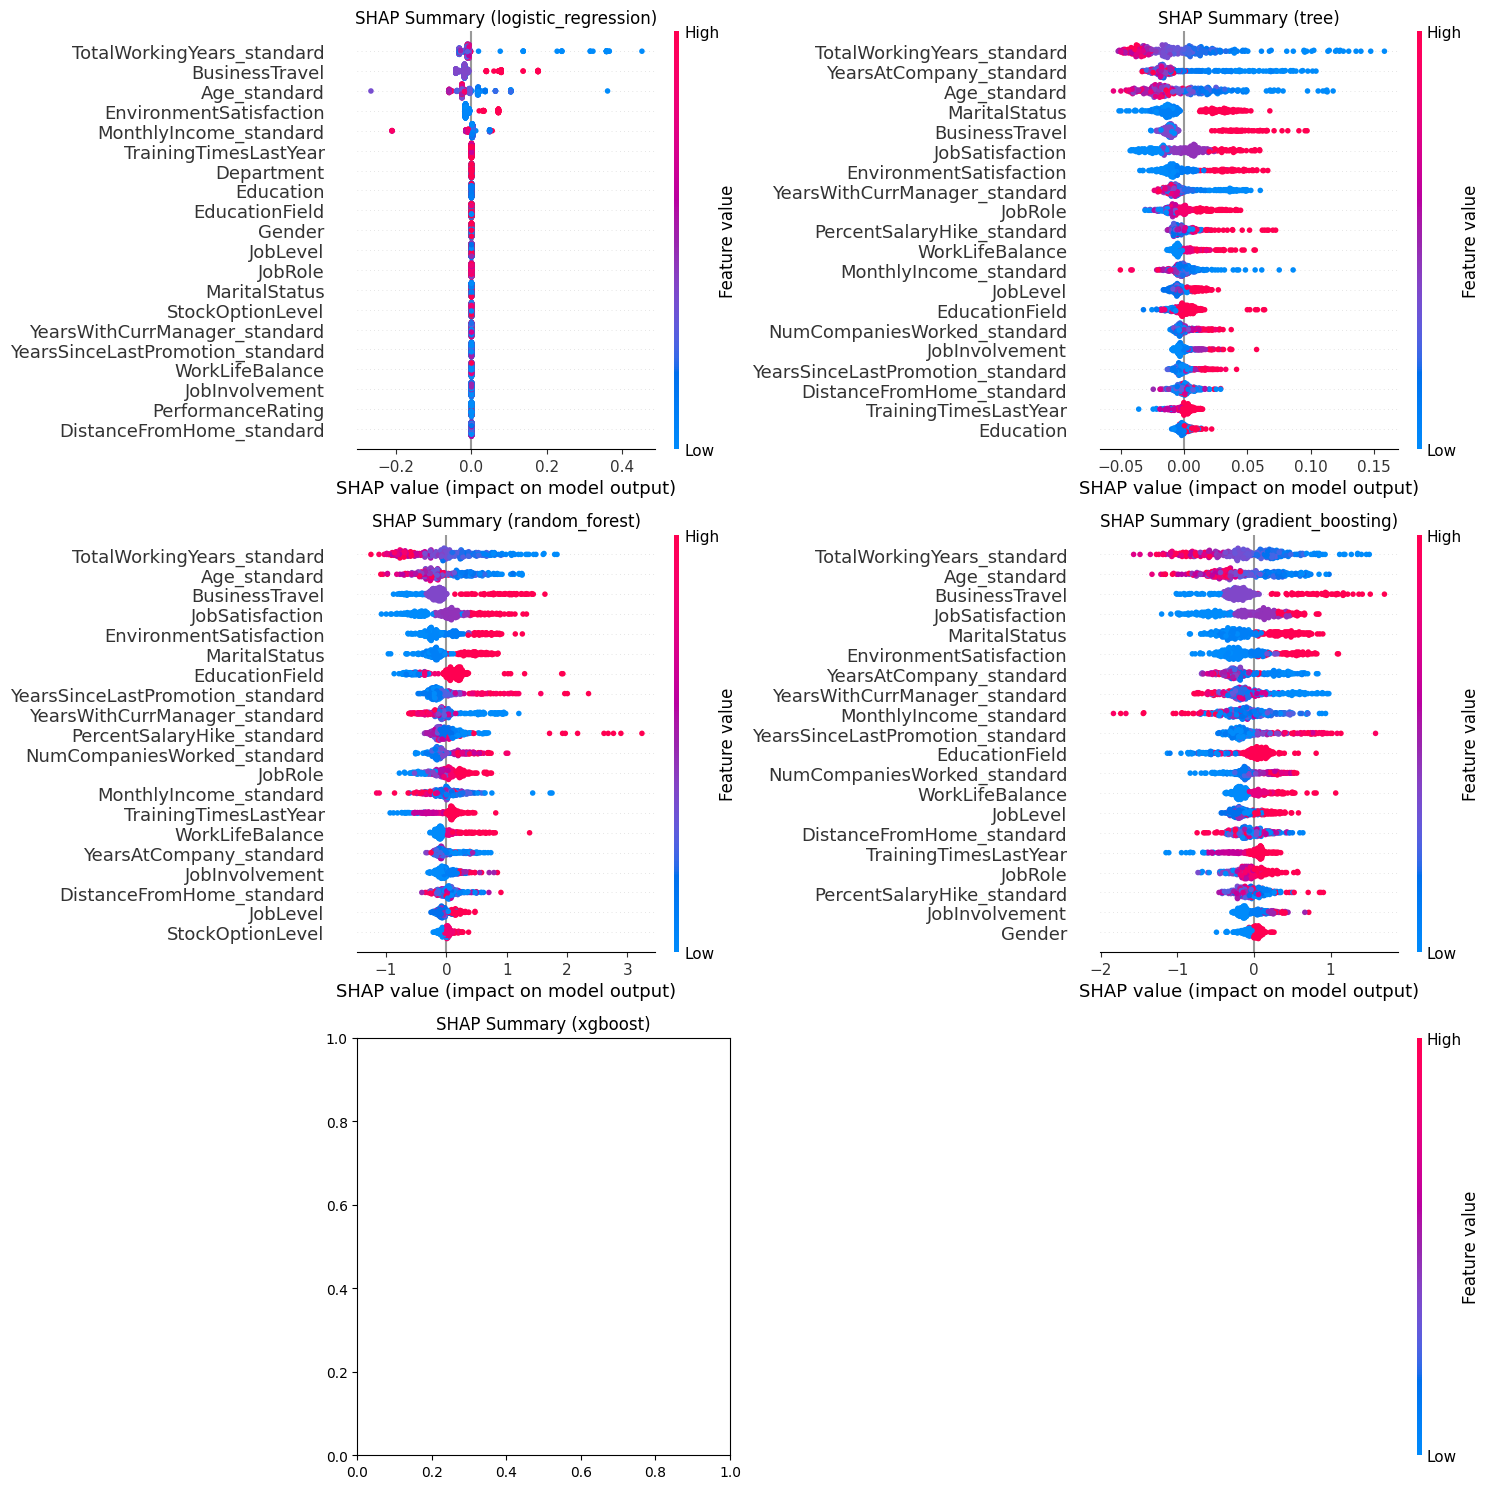

In [55]:
analisis_mod_clas.shap_plots(["logistic_regression", "tree", "random_forest", "gradient_boosting", "xgboost"], plot_size=(15, 15), figsize=(10, 5))

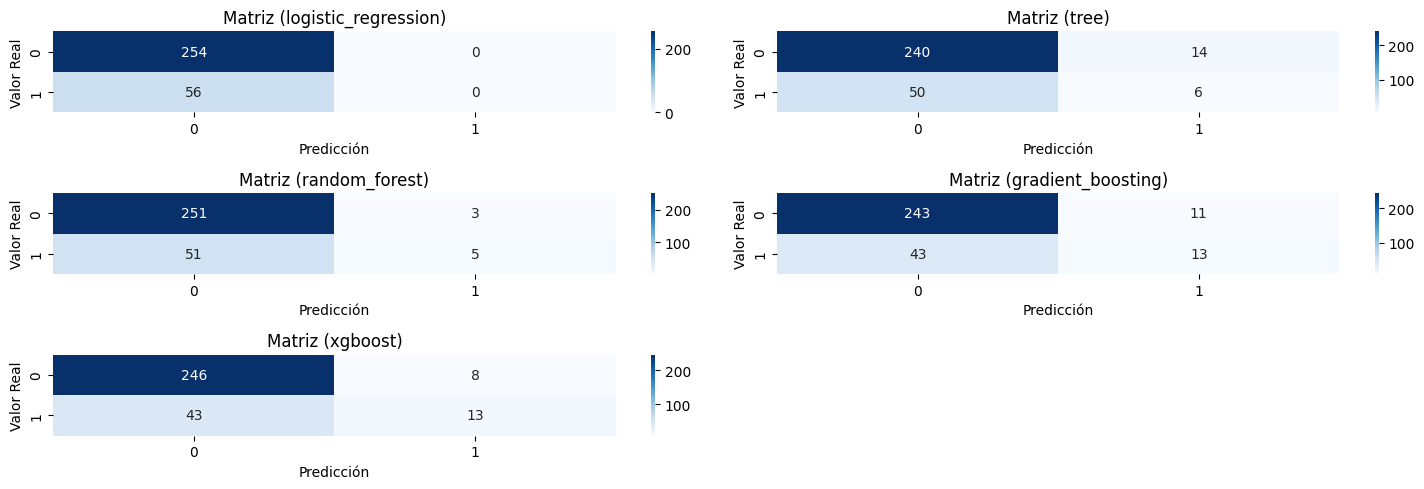

In [18]:
analisis_mod_clas.matrices_confusion(["logistic_regression", "tree", "random_forest", "gradient_boosting", "xgboost"], figsize=(15,5))

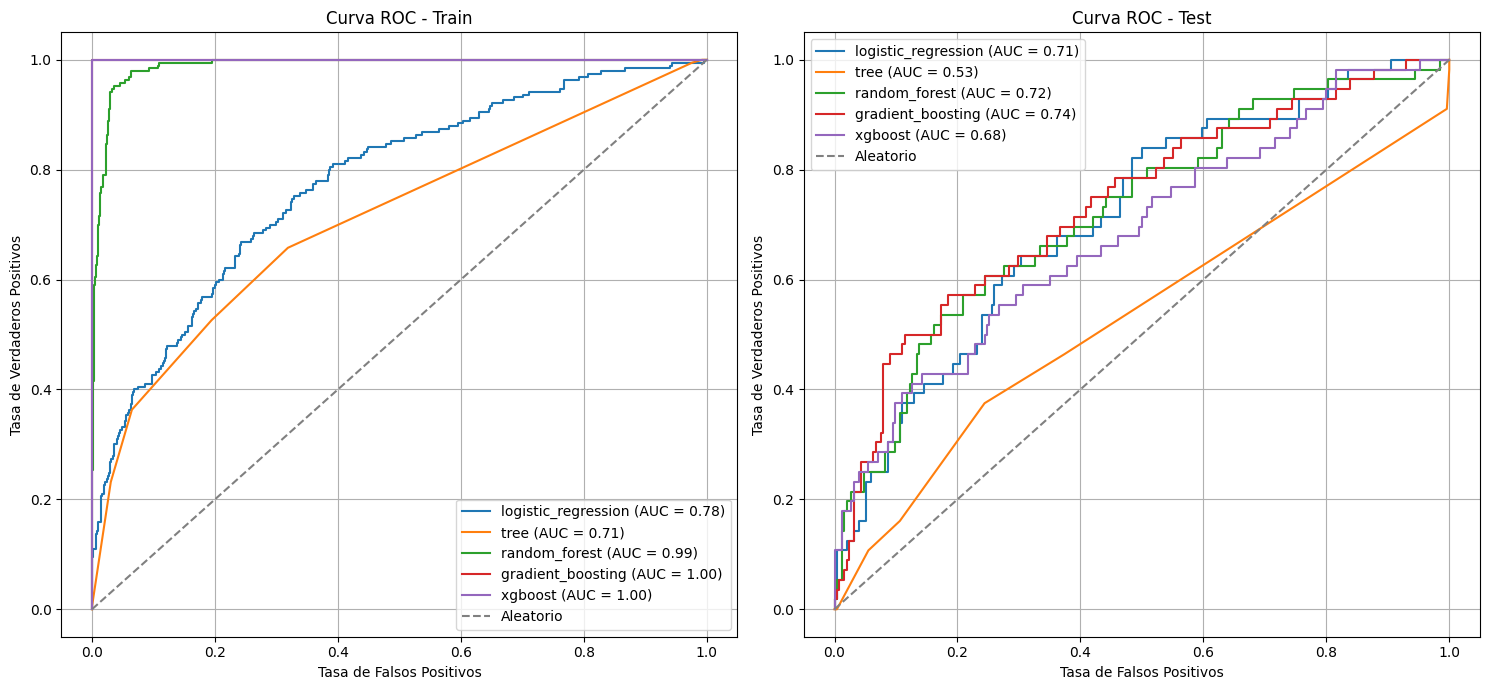

In [60]:
analisis_mod_clas.curvas_roc_combinadas(["logistic_regression", "tree", "random_forest", "gradient_boosting", "xgboost"])

La curva ROC es una representación visual del rendimiento del modelo en todos los umbrales.